In [2]:
import os
os.chdir("../")

In [3]:
import numpy as np
from helpers.classes import EVENT_DICTIONARY_V2_ALIVE as event_enc
import matplotlib.pyplot as plt
import seaborn as sns

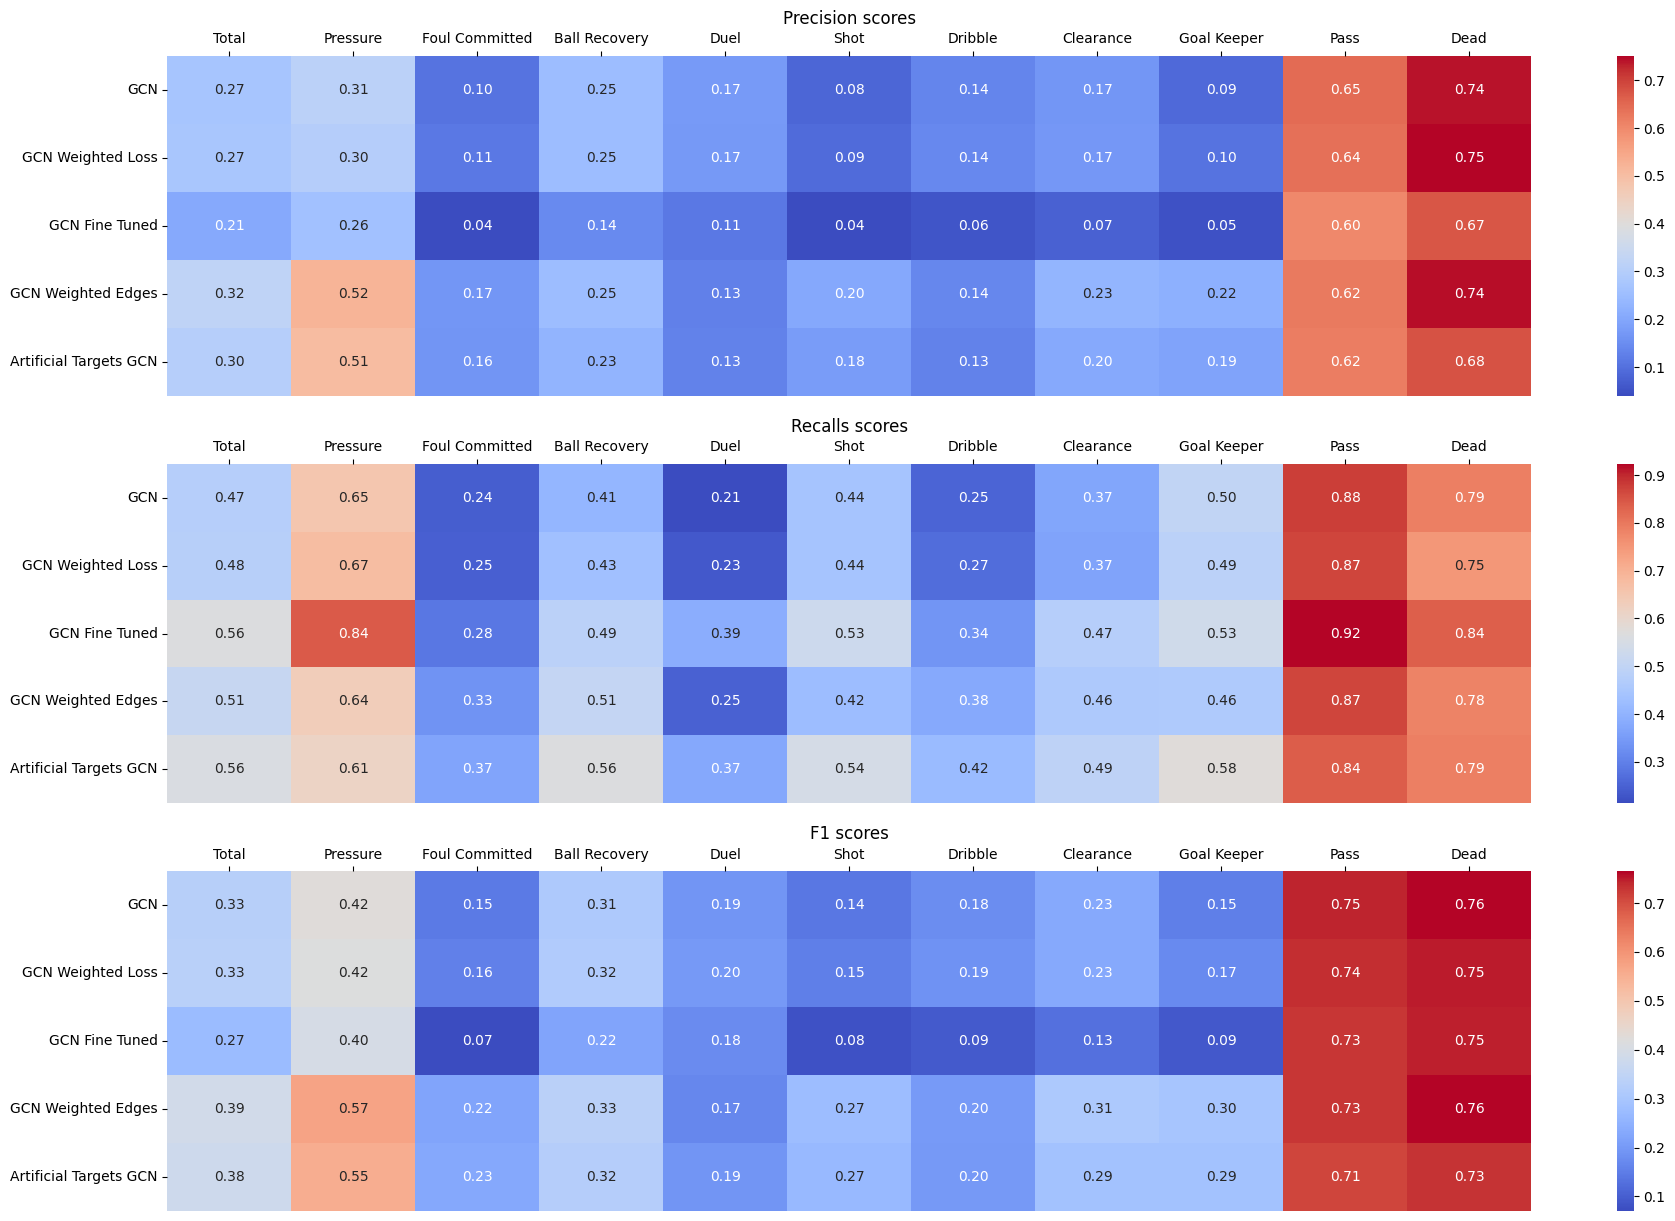

In [8]:
fine_tuned_results = np.array([
        [0.20535684, 0.25950521, 0.04016142, 0.14329976, 0.11359026,
        0.04248305, 0.05502981, 0.07415273, 0.0496162 , 0.60202886,
        0.67370114],
       [0.5630229 , 0.84308938, 0.28254035, 0.48596402, 0.38746375,
        0.52564444, 0.33685463, 0.4746617 , 0.53290455, 0.92373052,
        0.83737569],
       [0.27320983, 0.39685682, 0.07032637, 0.22133334, 0.17567809,
        0.07861257, 0.09460465, 0.12826726, 0.09078028, 0.72896479,
        0.74667409]
        ])

original_results = np.array([
        [0.27084123, 0.31417213, 0.10446239, 0.25043777, 0.17494885,
        0.08312177, 0.13571272, 0.16714905, 0.08999087, 0.64766015,
        0.74075665],
        [0.47498904, 0.65240959, 0.24317796, 0.40678925, 0.21307204,
        0.44106405, 0.25331055, 0.37085225, 0.50018622, 0.87873302,
        0.79029545],
        [0.32824337, 0.42411088, 0.14614501, 0.31001583, 0.19213764,
        0.13988178, 0.17673731, 0.23043662, 0.15253792, 0.74570612,
        0.76472461]
        ])


weighted_results = np.array([
        [0.27331514, 0.30038524, 0.11458326, 0.24925814, 0.17304197,
        0.09150715, 0.14183728, 0.16925064, 0.10469264, 0.63814438,
        0.75045071],
        [0.47682761, 0.67393145, 0.24597052, 0.43192353, 0.23388105,
        0.44334154, 0.26652117, 0.36549084, 0.48722221, 0.8699698 ,
        0.75002404],
        [0.33139381, 0.41555084, 0.15633787, 0.3160991 , 0.19891349,
        0.15170242, 0.18514439, 0.23136248, 0.17235108, 0.73623913,
        0.75023731]])

weighted_edges_GCN = np.array([[0.32223207, 0.52152657, 0.16564716, 0.24996457, 0.12692992,
        0.20342452, 0.1382265 , 0.23042868, 0.21799334, 0.62388921,
        0.74429021],
       [0.5101543 , 0.6350254 , 0.33433269, 0.50670832, 0.24713121,
        0.42263209, 0.37842827, 0.46009186, 0.46199442, 0.87094688,
        0.78425187],
       [0.38679145, 0.57270685, 0.22153397, 0.33477908, 0.16771774,
        0.27465162, 0.2024904 , 0.30706794, 0.29621624, 0.72700193,
        0.76374867]])
artificial_loss = np.array([[0.3030549 , 0.50601267, 0.16482619, 0.22701994, 0.12916582,
        0.17779471, 0.13100307, 0.20478546, 0.19164214, 0.61818192,
        0.68011711],
       [0.55780439, 0.6132209 , 0.36820142, 0.56465879, 0.37454381,
        0.54465272, 0.41765249, 0.49078122, 0.57565714, 0.83856698,
        0.79010848],
       [0.37848948, 0.5544822 , 0.22771517, 0.32384046, 0.19208788,
        0.26807867, 0.19944666, 0.28898698, 0.28755446, 0.71170391,
        0.73099842]])

precisions = np.concatenate((original_results[0,:], weighted_results[0,:], fine_tuned_results[0,:], weighted_edges_GCN[0,:], artificial_loss[0,:])).reshape(5,-1)
recalls = np.concatenate((original_results[1,:], weighted_results[1,:], fine_tuned_results[1,:], weighted_edges_GCN[1,:], artificial_loss[1,:])).reshape(5,-1)
f1_scores = np.concatenate((original_results[2,:], weighted_results[2,:], fine_tuned_results[2,:], weighted_edges_GCN[2,:], artificial_loss[2,:])).reshape(5,-1)


cols = ["Total"] + list(event_enc.keys())
rows = ["GCN", "GCN Weighted Loss", "GCN Fine Tuned", "GCN Weighted Edges", "Artificial Targets GCN"]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(22, 15))

ax1.set_title("Precision scores")
sns.heatmap(precisions, annot=True, cmap="coolwarm", fmt=".2f", xticklabels=True, yticklabels=True, ax=ax1)
ax1.set_xticklabels(cols, rotation=0)
ax1.xaxis.tick_top()
ax1.set_yticklabels(rows, rotation=0)

ax2.set_title("Recalls scores")
sns.heatmap(recalls, annot=True, cmap="coolwarm", fmt=".2f", xticklabels=True, yticklabels=True, ax=ax2)
ax2.set_xticklabels(cols, rotation=0)
ax2.xaxis.tick_top()
ax2.set_yticklabels(rows, rotation=0)

ax3.set_title("F1 scores")
sns.heatmap(f1_scores, annot=True, cmap="coolwarm", fmt=".2f", xticklabels=True, yticklabels=True, ax=ax3)
ax3.set_xticklabels(cols, rotation=0)
ax3.xaxis.tick_top()
ax3.set_yticklabels(rows, rotation=0)

plt.show()